In [31]:
# temporarly add to path for testing purposes before package creation
import sys
sys.path.append("../../")

In [32]:
import numpy as np
from phdtools import plots
from phdtools import computes

# Data handling and plotting

In `phdplots` we can find some simple tools to help with generic data handling and plotting.

We start with a small example using a test dataset, which will be imported from the sklearn library.

In [33]:
from sklearn import datasets

In [34]:
# number of points
Np = 1000
# data additional information
dummy_data_dict = dict(
    n_samples = Np,
    factor = 0.42,
    noise = 0.1,
    random_state = 73
)
dummy_data_dict

{'n_samples': 1000, 'factor': 0.42, 'noise': 0.1, 'random_state': 73}

In [35]:
# generation of a dummy dataset using sklearn lib
# (official page for details)
X, y = datasets.make_circles(**dummy_data_dict)
print(X.shape, y.shape)

(1000, 2) (1000,)


We can easily generate normal distributed data using the numpy library.

In [36]:
# 2D gaussian
X2dG = np.random.multivariate_normal([0,0], [[1,0],[0,1]], Np)
# 3D gaussian
X3dG = np.random.multivariate_normal([0,0,0], [[1,0,0],[0,1,0],[0,0,1]], Np)

### Data sampling examples

All these examples are intended to work with the data matrix $X$ being regarded as 

$X = [N_{samples} \times N_{features}]$ ,

the sampling will select a number $N_{sampling} << N_{samples}$ chosen following a certain set rule.

**1. random sampling**

In [37]:
N_sampling = 100

In [38]:
X_rnd, y_rnd = computes.data.random_shuffle(X=X, 
                                            Y=y, 
                                            n=N_sampling)
X_rnd.shape, y_rnd.shape

((100, 2), (100,))

In [39]:
X2dG_rnd = computes.data.random_shuffle(X=X2dG,
                                        Y=None,
                                        n=N_sampling)
X2dG_rnd.shape

(100, 2)

**2. furthest point sampling**

In [40]:
X_fps, fps_ndx = computes.data.FPS(X=X, 
                                   n=100)
X_fps.shape

(100, 2)

In [41]:
X2dG_fps, _ = computes.data.FPS(X=X2dG, 
                                n=100)
X2dG_fps.shape

(100, 2)

Finally, from the `phdtools.plots` we can access few simplified way to plot these data.
We start by init the figure variables in a dictionary.

In [42]:
# init the figure object details
fig1_setup = dict(
    plots = 6,
    max_col = 3,
    # these are set by default
    # fig_frame = (3.3,3),
    # res = 200
)

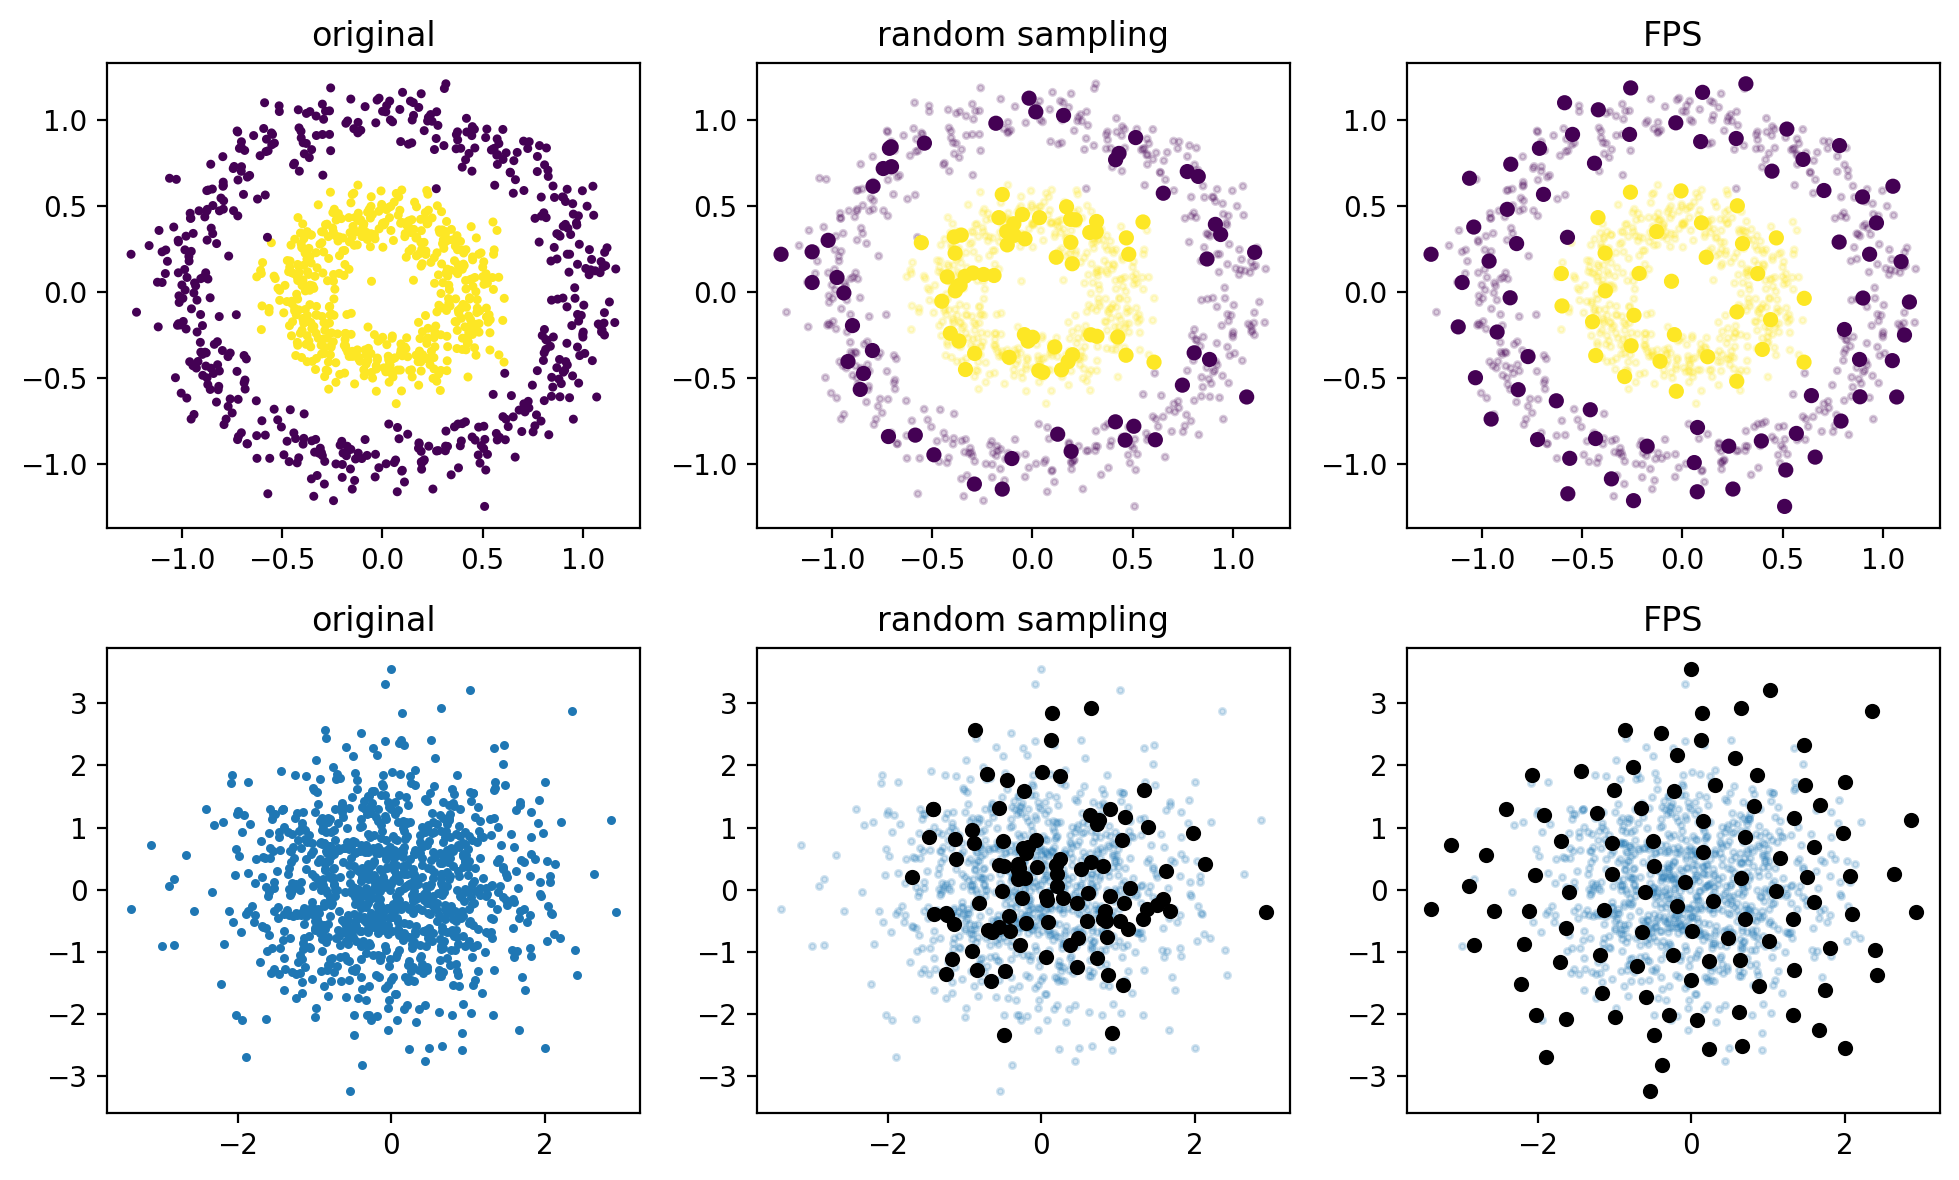

In [43]:
fig1, ax = plots.get_axes(**fig1_setup)
ax[0].scatter(*X.T, c=y, s=5)
ax[1].scatter(*X.T, c=y, s=5, alpha=0.2)
ax[1].scatter(*X_rnd.T, c=y_rnd, s=20)
ax[2].scatter(*X.T, c=y, s=5, alpha=0.2)
y_fps = y[fps_ndx]
ax[2].scatter(*X_fps.T, c=y_fps, s=20)

ax[3].scatter(*X2dG.T, s=5)
ax[4].scatter(*X2dG.T, s=5, alpha=0.2)
ax[4].scatter(*X2dG_rnd.T, c='k', s=20)
ax[5].scatter(*X2dG.T, s=5, alpha=0.2)
ax[5].scatter(*X2dG_fps.T, c='k', s=20)

plt_titles = ['original', 'random sampling', 'FPS']
for i in range(fig1_setup['plots']):
    ax[i].set_title(plt_titles[i%fig1_setup['max_col']])

fig1.tight_layout()

### Data normalisation

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# 2D gaussian not standadised
X2dG_ns = np.random.multivariate_normal([-2,3], [[2,1],[1,1]], Np)
X2dG_ns.mean(axis=0), X2dG_ns.std(axis=0)

(array([-2.00223411,  2.99559596]), array([1.44274093, 0.99865533]))

In [46]:
# X2dG_norm = computes.data.normalizeData(X=X2dG_ns)
# np.mean(X2dG_norm, axis=0)

In [47]:
X2dG_norm = StandardScaler().fit_transform(X=X2dG_ns)
X2dG_norm.mean(axis=0), X2dG_norm.std(axis=0)

(array([-1.61370917e-16,  1.54116650e-15]), array([1., 1.]))

In [28]:
fig2_setup = dict(
    P = 2,
    max_col = 2,
    fig_frame = (3.3,3),
    res = 200
)

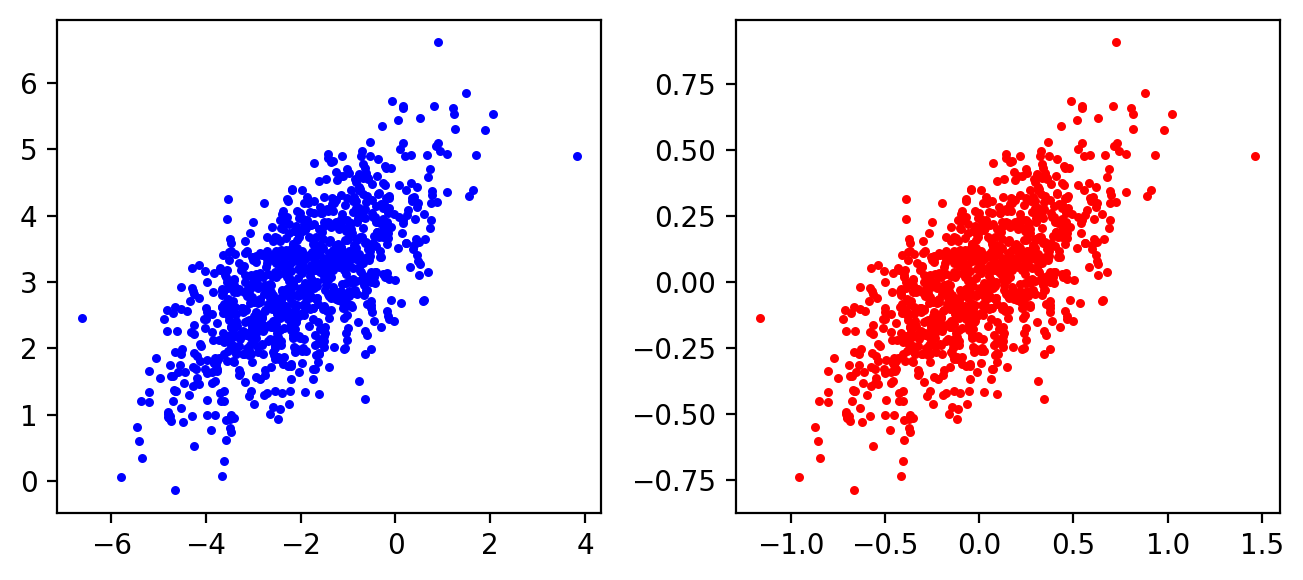

In [29]:
fig2, ax = plots.get_axes(**fig2_setup)
ax[0].scatter(*X2dG_ns.T, s=5, c='b')
ax[1].scatter(*X2dG_norm.T, s=5, c='r')
fig2.tight_layout()

### FES computation

In [30]:
fig3_setup = dict(
    P = 3,
    max_col = 3,
    fig_frame = (3.3,3),
    res = 200
)

In [31]:
data_list = [X, X2dG, X2dG_norm]

Plotting 2D FES.
Plotting 2D FES.
Plotting 2D FES.


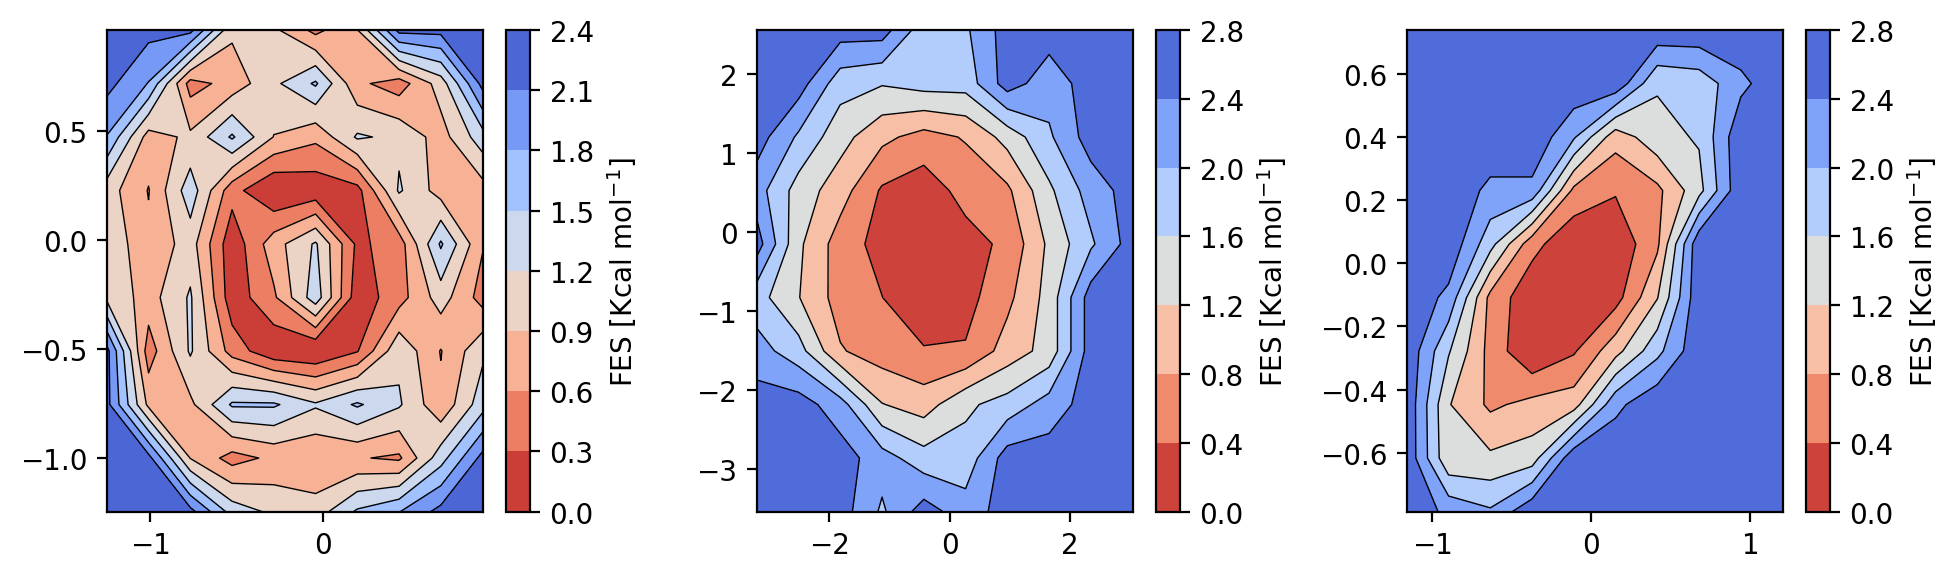

In [40]:
fig3, ax = plots.get_axes(**fig3_setup)

FES_calc = computes.fes.FES(units='kcal',
                            temp=300)

for i,D in enumerate(data_list):
    
    fes_compute_tmp = dict(
        X = D[:,0],
        Y = D[:,1],
        bins = 10
    )
    fes_plot = dict(
        figure=fig3, 
        axes=ax[i],
        levels = 7,
        contlabels = False,
        cbar_label = r'FES [Kcal mol$^{-1}$]'
    )

    fes_output = FES_calc.fit_plot(**fes_compute_tmp, 
                                   plotArgs=fes_plot)

fig3.tight_layout()

In [2]:
import numpy as np

In [4]:
type(np.zeros(100))

numpy.ndarray

In [6]:
x = np.array([1,1,2,4,5,6,6,7,7,4])
mi, ma = x.min(), x.max()

In [8]:
ma

7